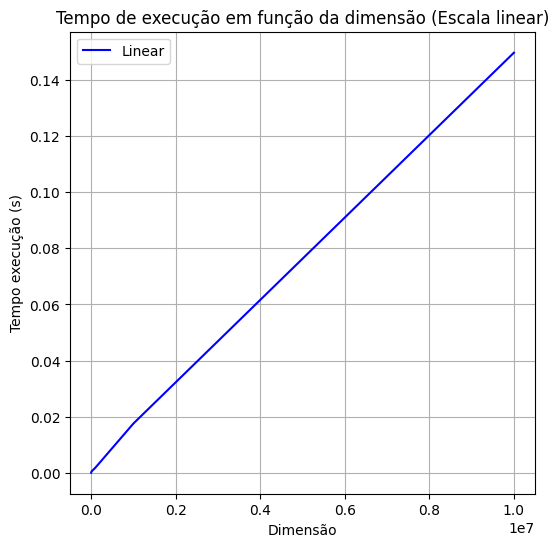

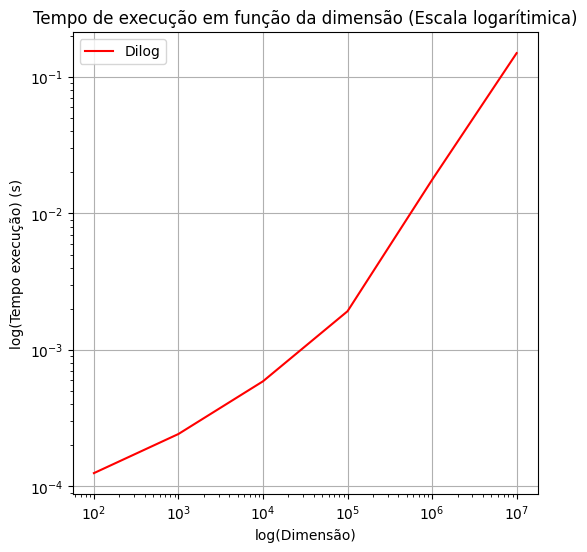

In [ ]:
# ++++ QUESTÃO 1 primeira parte ++++

import numpy as np
import time
from matplotlib import pyplot as plt


def func1(n):

    a = np.random.rand(n)
    b = np.random.rand(n)

    alpha = np.random.rand()
    beta = np.random.rand()

    c = (alpha * a) + (beta * b)

    return c

dimen = [100, 1000 ,10**4, 10**5, 10**6, 10**7,]

tempos = []

for n in dimen:
    t0 = time.time()
    func1(n)
    t = time.time()
    tempos.append(t-t0)


plt.figure(figsize=(6,6))
plt.plot(dimen,tempos , color = 'b' , label='Linear')
plt.title("Tempo de execução em função da dimensão (Escala linear)")
plt.xlabel("Dimensão")
plt.ylabel("Tempo execução (s)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6,6))
plt.loglog(dimen, tempos, color = 'r' , label='Dilog')
plt.title("Tempo de execução em função da dimensão (Escala logarítimica)")
plt.xlabel("log(Dimensão)")
plt.ylabel("log(Tempo execução) (s)")
plt.legend()
plt.grid()
plt.show()

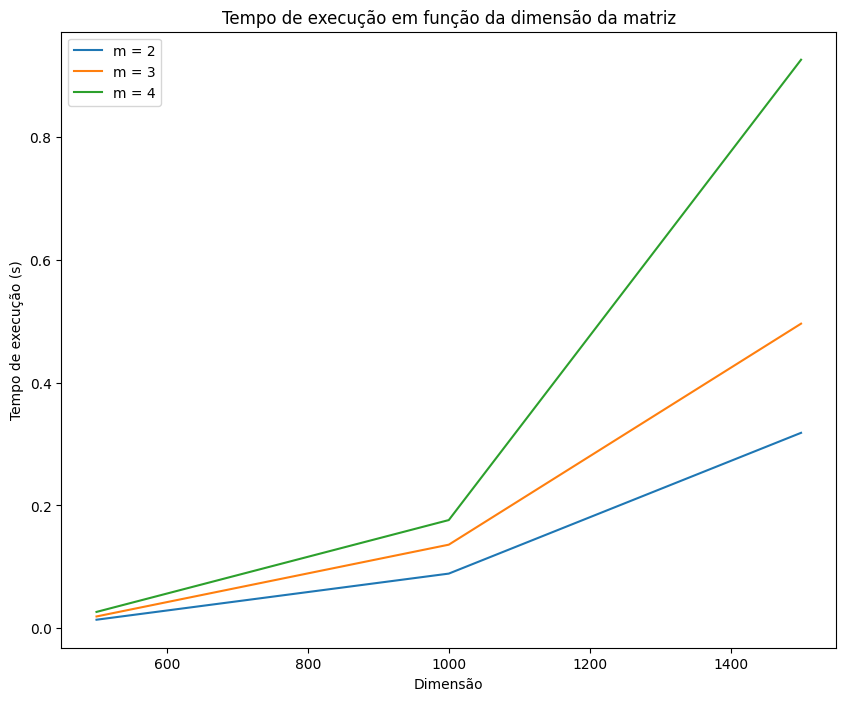

In [ ]:
# +++++ QUESTÃO 1 segunda parte +++++

import numpy as np
import time
from matplotlib import pyplot as plt


tempos_potencia = {2: [], 3:[], 4:[]}
potencias = [2,3,4]
dimensoes = [500,1000,1500]

def func2(dimensao):


  def pro_matrizes(a,m):
    result = np.identity(a.shape[0])
    for i in range(m):
      result = result @ a

  matriz = np.random.rand(dimensao,dimensao)

  for potencia in potencias:
        to = time.time()
        pro_matrizes(matriz,potencia)
        t = time.time()
        tempos_potencia[int(potencia)].append(float(t - to))



for dimensao in dimensoes:
  func2(dimensao)


# +++++ Plotagem ++++++

plt.figure(figsize=(10,8))
plt.title("Tempo de execução em função da dimensão da matriz")
plt.xlabel("Dimensão")
plt.ylabel("Tempo de execução (s)")

plt.plot(dimensoes, tempos_potencia[2], label=f'm = 2')
plt.plot(dimensoes, tempos_potencia[3], label=f'm = 3')
plt.plot(dimensoes, tempos_potencia[4], label=f'm = 4')


plt.legend()
plt.show()





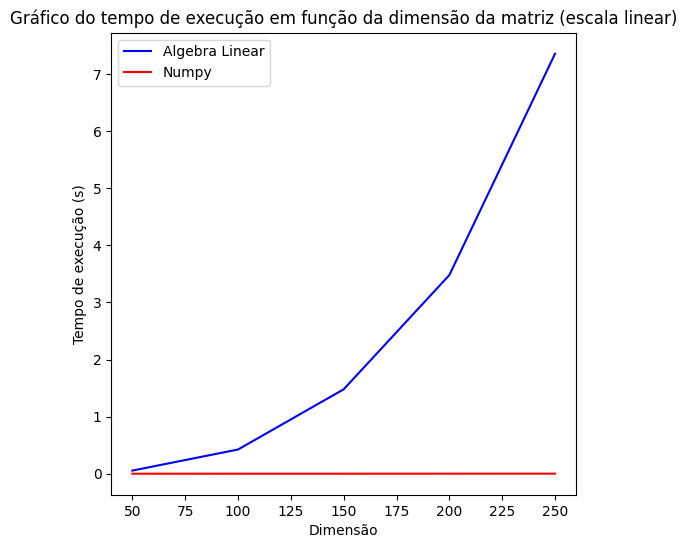

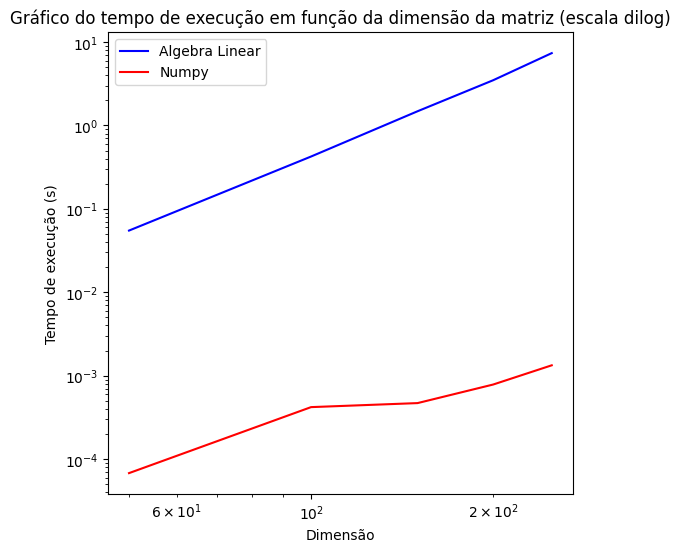

In [ ]:
# ++++ QUESTÃO 2 ++++

import numpy as np
import time
from matplotlib import pyplot as plt


def pro_matriz(a,b):
    # Checando se o que recebe como argumento são realmente matrizes 2D do numpy

    if(a.ndim != 2 or b.ndim != 2):
        raise ValueError(f"Os elementos de entrada precisam ser matrizes quadradas")

    if(a.shape[1] != b.shape[0]):
        raise ValueError(f"Erro, o número de colunas da primeira matriz deve ser igual ao número de linhas da segunda matriz")

    # Aloca na memória a matriz de saída

    c = np.ones(shape = (a.shape[0], b.shape[1]))

    # Realiza a o produto entre as matrizes

    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            sum = 0
            for k in range(a.shape[1]):
                sum += a[i][k]*b[k][j]
            c[i][j] = sum
    # O loop com i varre as linhas da matriz a, o loop com j varre as colunas da matriz b e a o loop em k varre os elementos da linha de a da coluna de b
    return c



#Inicializas as listas para armazernar os tempos decorridos com cada produto de matrizes

tempos_alg = []
tempos_numpy = []
dimensoes = [50,100,150,200,250]

def pro_matriz_algelin(r):
    # Criar as matrizes de dimensão r
    m1 = np.ones(shape = (r,r))
    m2 = np.ones(shape = (r,r))
    # Coloca em cada elemento dessa matriz valores aleatórios
    for i in range(r):
        for j in range(r):
            m1[i][j] = np.random.rand()
            m2[i][j] = np.random.rand()
    to = time.time()
    pro_matriz(m1,m2)
    t = time.time()

    return t-to

def pro_matriz_numpy(r):
    m1 = np.random.rand(r,r)
    m2 = np.random.rand(r,r)
    to = time.time()
    m1 @ m2
    t = time.time()

    return t - to

for i in range(len(dimensoes)):
    tempos_alg.append(pro_matriz_algelin(dimensoes[i]))
    tempos_numpy.append(pro_matriz_numpy(dimensoes[i]))


# ++++ Plotagem ++++

plt.figure(figsize=(6,6))
plt.title("Gráfico do tempo de execução em função da dimensão da matriz (escala linear)")
plt.xlabel("Dimensão")
plt.ylabel("Tempo de execução (s)")

plt.plot(dimensoes, tempos_alg, label = "Algebra Linear", color = 'b')
plt.plot(dimensoes, tempos_numpy, label = "Numpy", color = 'r')

plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.title("Gráfico do tempo de execução em função da dimensão da matriz (escala dilog)")
plt.xlabel("Dimensão")
plt.ylabel("Tempo de execução (s)")

plt.loglog(dimensoes, tempos_alg, label = "Algebra Linear", color = 'b')
plt.loglog(dimensoes, tempos_numpy, label = "Numpy", color = 'r')

plt.legend()
plt.show()









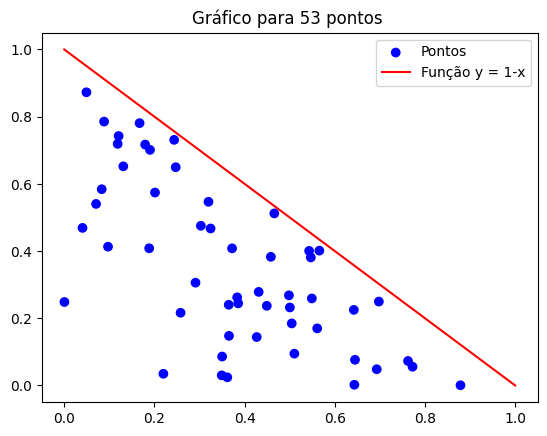

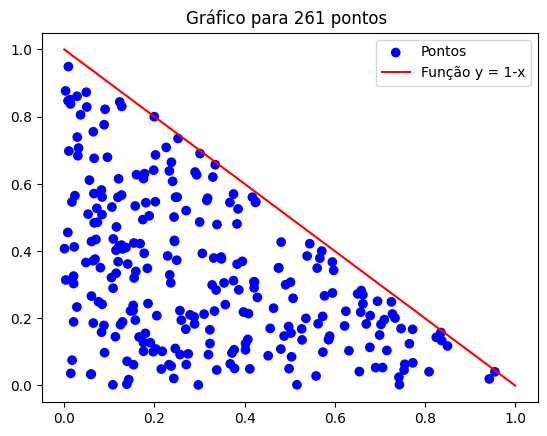

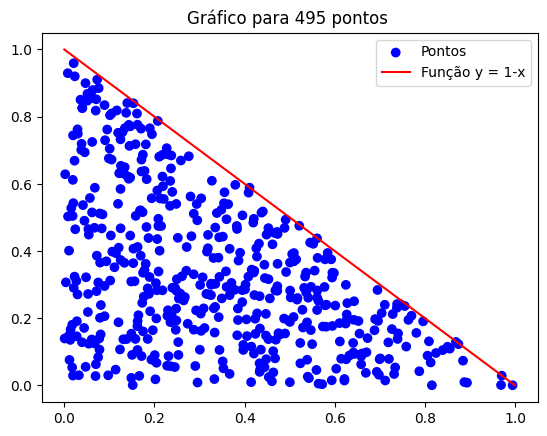

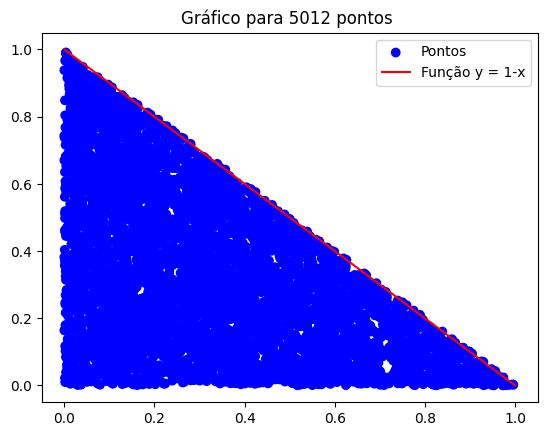

In [ ]:
# ++++ QUESTÃO 3 ++++

import numpy as np
from matplotlib import pyplot as plt

def esta_na_regiao(x,y):
    if(y <= 1-x):
        return True
    return False

def func(x):
    return 1-x

lista_n = [100,500 ,1000, 10000]
for n in lista_n:
  cord_x = np.random.rand(n)
  cord_y = np.random.rand(n)
  cord_x_pontos = []
  cord_y_pontos = []



  for i in range(n):
      if(esta_na_regiao(cord_x[i], cord_y[i])):
          cord_x_pontos.append(float(cord_x[i]))
          cord_y_pontos.append(float(cord_y[i]))



  dom = np.linspace(0.0, 1.0, 100)
  imagem = func(dom)

  plt.title(f"Gráfico para {len(cord_x_pontos)} pontos ")

  plt.scatter(cord_x_pontos, cord_y_pontos, marker = 'o', linestyle = '', color = 'b', label = 'Pontos')
  plt.plot(dom,imagem, label = "Função y = 1-x", color = 'r')
  plt.legend()
  plt.show()

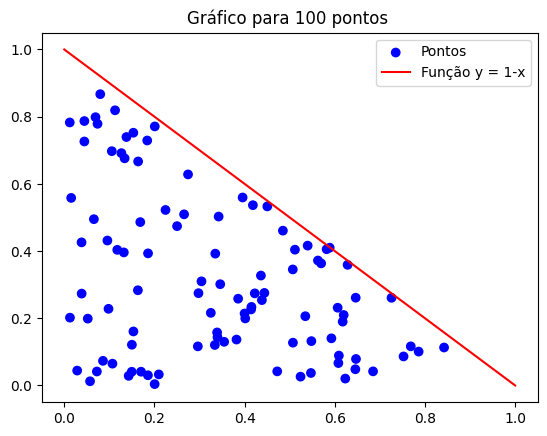

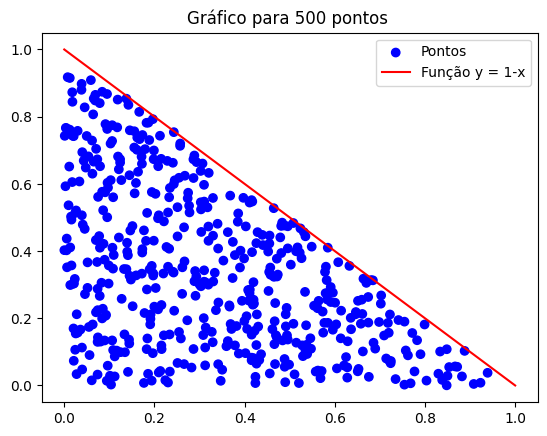

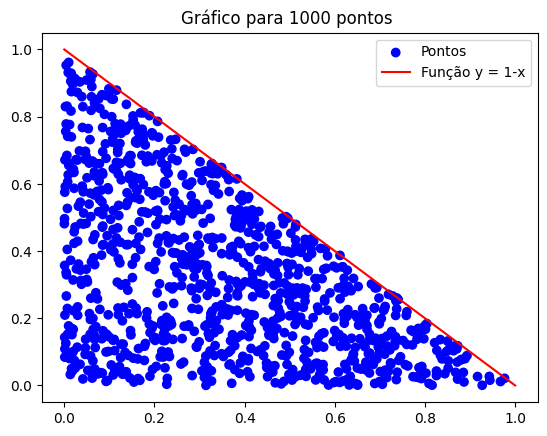

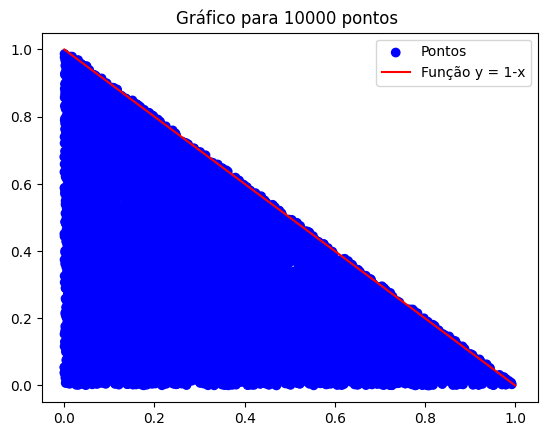

In [ ]:
# ++++ QUESTÃO 3 ++++

import numpy as np
from matplotlib import pyplot as plt

def esta_na_regiao(x,y):
    if(y <= 1-x):
        return True
    return False

def func(x):
    return 1-x

lista_n = [100,500 ,1000, 10000]
for n in lista_n:
  cord_x_pontos = []
  cord_y_pontos = []
  counter = 0
  while len(cord_x_pontos) < n:
    cord_x = np.random.rand()
    cord_y = np.random.rand()
    if esta_na_regiao(cord_x,cord_y):
      counter += 1
      cord_x_pontos.append(float(cord_x))
      cord_y_pontos.append(float(cord_y))
  dom = np.linspace(0.0, 1.0, 100)
  imagem = func(dom)

  plt.title(f"Gráfico para {len(cord_x_pontos)} pontos ")

  plt.scatter(cord_x_pontos, cord_y_pontos, marker = 'o', linestyle = '', color = 'b', label = 'Pontos')
  plt.plot(dom,imagem, label = "Função y = 1-x", color = 'r')



  plt.legend()
  plt.show()

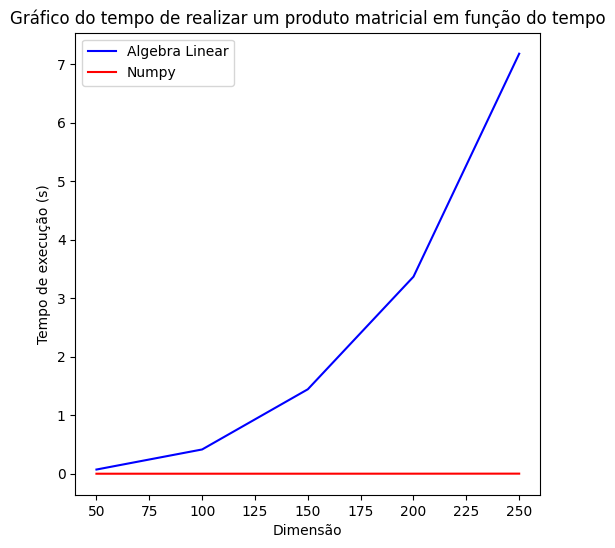

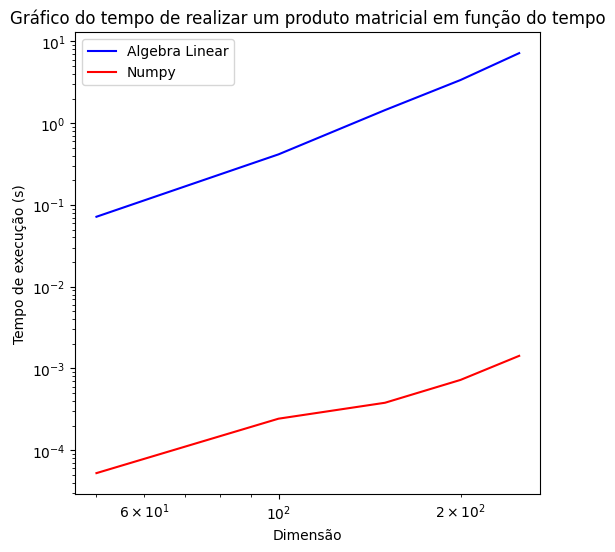

In [ ]:
# ++++ QUESTÃO 4 ++++

import numpy as np
import time
from matplotlib import pyplot as plt


def pro_matriz(a,b):
    # Checando se o que recebe como argumento são realmente matrizes 2D do numpy

    if(a.ndim != 2 or b.ndim != 2):
        raise ValueError(f"Os elementos de entrada precisam ser matrizes quadradas")

    if(a.shape[1] != b.shape[0]):
        raise ValueError(f"Erro, o número de colunas da primeira matriz deve ser igual ao número de linhas da segunda matriz")

    # Aloca na memória a matriz de saída

    c = np.ones(shape = (a.shape[0], b.shape[1]))

    # Realiza a o produto entre as matrizes

    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            sum = 0
            for k in range(a.shape[1]):
                sum += a[i][k]*b[k][j]
            c[i][j] = sum
    # O loop com i varre as linhas da matriz a, o loop com j varre as colunas da matriz b e a o loop em k varre os elementos da linha de a da coluna de b

    return c



#Inicializas as listas para armazernar os tempos decorridos com cada produto de matrizes

tempos_alg = []
tempos_numpy = []
dimensoes = [50,100,150,200,250]

def pro_matriz_algelin(r):
    # Criar as matrizes de dimensão r
    m1 = np.ones(shape = (r,r))
    m2 = np.ones(shape = (r,r))
    # Coloca em cada elemento dessa matriz valores aleatórios
    for i in range(r):
        for j in range(r):
            m1[i][j] = np.random.rand()
            m2[i][j] = np.random.rand()
    to = time.time()
    pro_matriz(m1,m2)
    t = time.time()

    return t-to

def pro_matriz_numpy(r):
    m1 = np.random.rand(r,r)
    m2 = np.random.rand(r,r)
    to = time.time()
    m1 @ m2
    t = time.time()

    return t - to

for i in range(len(dimensoes)):
    tempos_alg.append(pro_matriz_algelin(dimensoes[i]))
    tempos_numpy.append(pro_matriz_numpy(dimensoes[i]))


# Gráfico em escala linear

plt.figure(figsize=(6,6))
plt.title("Gráfico do tempo de realizar um produto matricial em função do tempo")

plt.plot(dimensoes, tempos_alg, label = "Algebra Linear", color = 'b')
plt.plot(dimensoes, tempos_numpy, label = "Numpy", color = 'r')

plt.ylabel("Tempo de execução (s)")
plt.xlabel("Dimensão")


plt.legend()
plt.show()

# Gráfico na escala dilog

plt.figure(figsize=(6,6))
plt.title("Gráfico do tempo de realizar um produto matricial em função do tempo")

plt.plot(dimensoes, tempos_alg, label = "Algebra Linear", color = 'b')
plt.plot(dimensoes, tempos_numpy, label = "Numpy", color = 'r')

plt.ylabel("Tempo de execução (s)")
plt.xlabel("Dimensão")

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()








Questão 3

O produto matricial é dado pela fórmula:
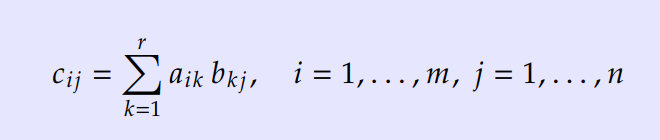

Em que m é o número de linhas da primeira matriz utilizada no produto e n é a dimensão de colunas da segunda matriz, a dimensão da matriz resultante será m x n e uma condição fundalmental para que seja possível realizar o produto é que o número de colunas da primeira matriz seja equivalente ao número de linhas da segunda coluna

o loop com i é um loop que ocorre percorre as linhas da primeira matriz, o loop em j percorre as colunas da segunda matriz, enquanto k produz o somatório de produtos para formar o elemento c_ij


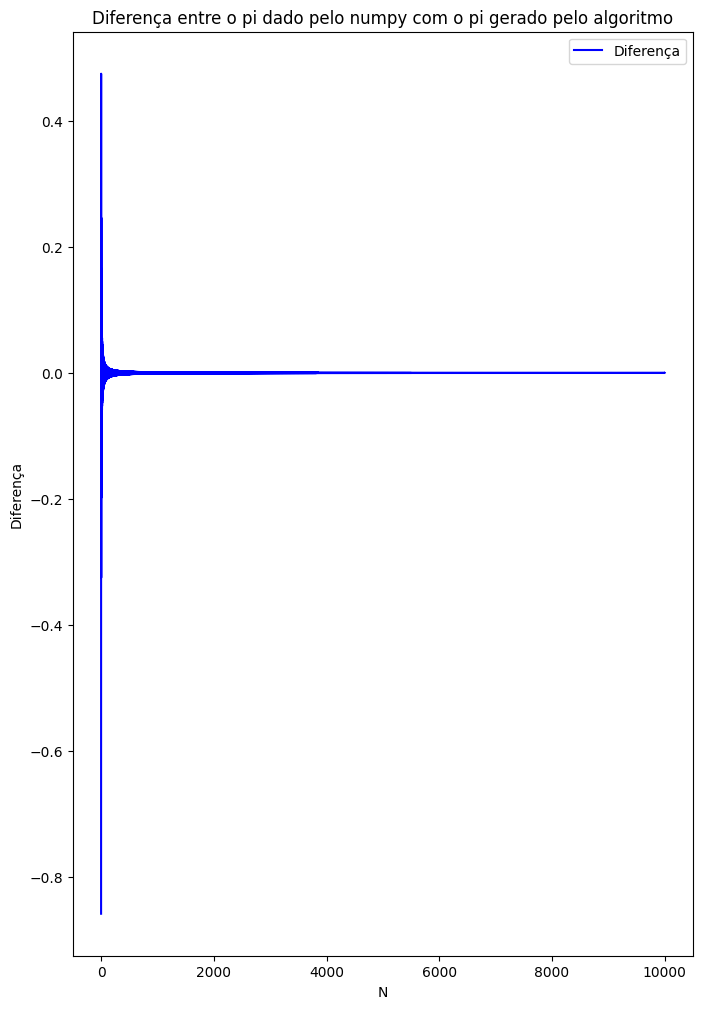

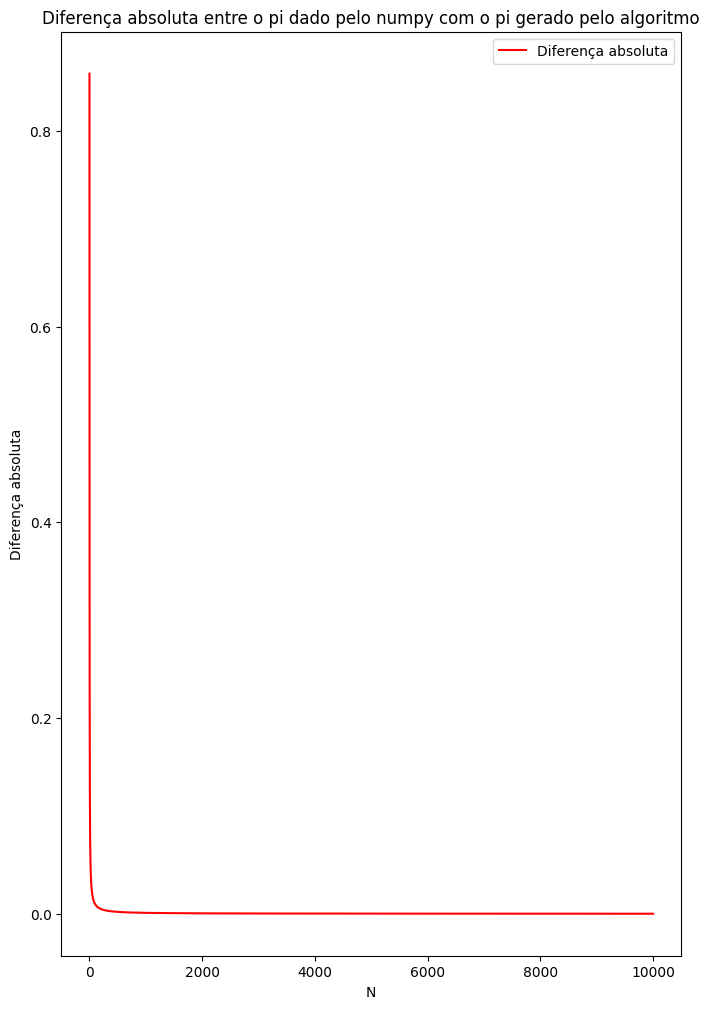

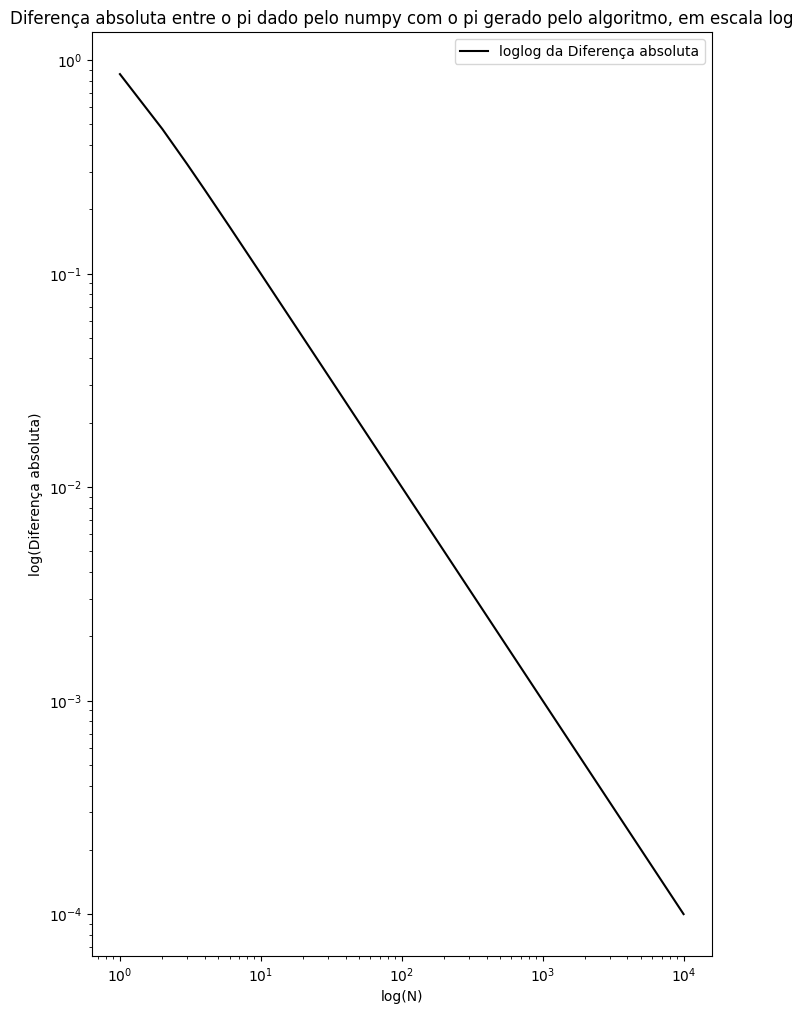

In [ ]:
# ++++ QUESTÃO 4 ++++

import numpy as np
from matplotlib import pyplot as plt

def pi(n):
    sum = 0
    for i in range(n-1):
        sum += ((-1)**(i+1))/(3+2*(i))
    return 4*(1+sum)

k = 10000

erros = []
erros_absolutos = []

valores = []

for i in range(1, k + 1):
    valores.append(i)



for n in valores:
    erros.append(np.pi - pi(n))
    erros_absolutos.append(abs(np.pi - pi(n)))


for i in range(3):
  if i == 0:

    plt.figure(figsize=(8,12))
    plt.title("Diferença entre o pi dado pelo numpy com o pi gerado pelo algoritmo")
    plt.xlabel("N")
    plt.ylabel("Diferença")

    plt.plot(valores, erros, color = 'b', label="Diferença")

    plt.legend()
    plt.show()


  if i == 1:
    plt.figure(figsize=(8,12))
    plt.title("Diferença absoluta entre o pi dado pelo numpy com o pi gerado pelo algoritmo")
    plt.xlabel("N")
    plt.ylabel("Diferença absoluta")

    plt.plot(valores, erros_absolutos, color = 'r', label="Diferença absoluta")

    plt.legend()
    plt.show()

  if i == 2:
    plt.figure(figsize=(8,12))
    plt.title("Diferença absoluta entre o pi dado pelo numpy com o pi gerado pelo algoritmo, em escala log")
    plt.xlabel("log(N)")
    plt.ylabel("log(Diferença absoluta)")

    plt.plot(valores, erros_absolutos, color = 'k', label="loglog da Diferença absoluta")

    plt.xscale('log')
    plt.yscale('log')

    plt.legend()
    plt.show()







/tmp/ipython-input-1477220898.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


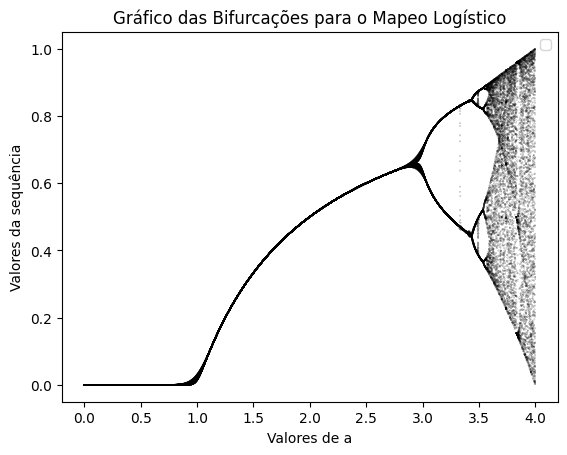

In [ ]:
# +++++ QUESTÃO 7 +++++
import numpy as np
from matplotlib import pyplot as plt

# Será o número de termos na sequência

N = 60

# 2000 Valores diferentes para a variando de 0 até 4

lista_a = np.linspace(0.0,4.0,2000)

# Pegar os m últimos termos da sequência para encontrar os valores para os quais a sequência converge

m = 40

# OBS: coloquei como limite superior para inicialmente como sendo 5, porém deu erro "overflow encountered in scalar multiply"


for a in list(lista_a):
    seq = [0.1]
    for n in range(1,N + 1):
        seq.append((a*seq[n-1])*(1-seq[n-1]))
    #Inicializo uma lista com valores de a repetidos para que possa fazer o plot
    a_contantes = np.ones(m)*a
    plt.scatter(a_contantes, seq[-m:], color='k', marker='o', linestyle='', s=0.01)
plt.title("Gráfico das Bifurcações para o Mapeo Logístico")
plt.xlabel("Valores de a")
plt.ylabel("Valores da sequência")
plt.legend()
plt.show()

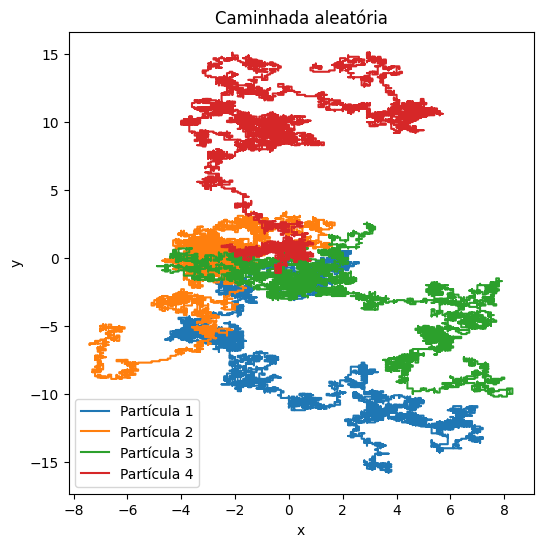

[(2.8000000000000007, -14.999999999999963), (-6.8999999999999915, -4.899999999999999), (6.599999999999994, -7.39999999999999), (1.2000000000000002, 13.999999999999966)]


In [ ]:
# +++++ QUESTÃO 11 +++++

import numpy as np
from matplotlib import pyplot as plt

# Número de partículas
pos_final = []
N = 4
plt.figure(figsize=(6,6))
plt.title("Caminhada aleatória")
plt.xlabel("x")
plt.ylabel("y")

def caminhada_aleatória(delta, passos):
  direcoes_x=[]
  direcoes_y=[]

  direcoes = np.random.randint(0,4, passos)

  for i in range(passos):
    if  direcoes[i] == 0:

      direcoes_x.append(1)
      direcoes_y.append(0)

    elif list(direcoes)[i] == 1:
      direcoes_x.append(-1)
      direcoes_y.append(0)

    elif list(direcoes)[i] == 2:
      direcoes_y.append(1)
      direcoes_x.append(0)

    else:
      direcoes_y.append(-1)
      direcoes_x.append(0)



  xo = 0
  yo = 0
  coord_x = [0]
  coord_y = [0]

  for i in range(passos):
    xo += direcoes_x[i]*delta
    yo += direcoes_y[i]*delta
    coord_x.append(xo)
    coord_y.append(yo)

  plt.plot(coord_x, coord_y, label=f"Partícula {j+1}")
  pos_final.append((xo,yo))




for j in range(N):
  caminhada_aleatória(0.1,10000)




plt.legend()
plt.show()
print(pos_final)






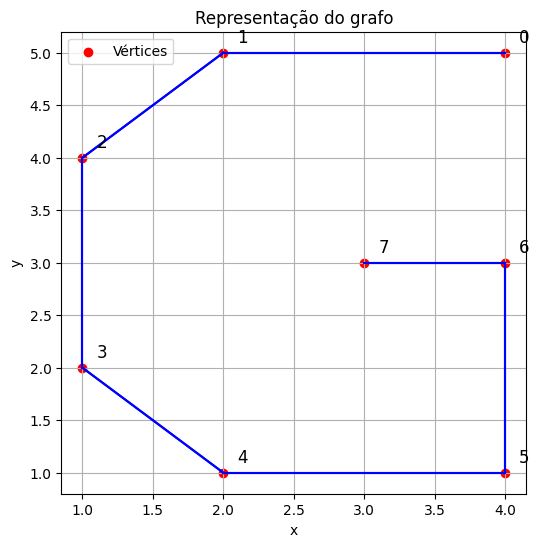

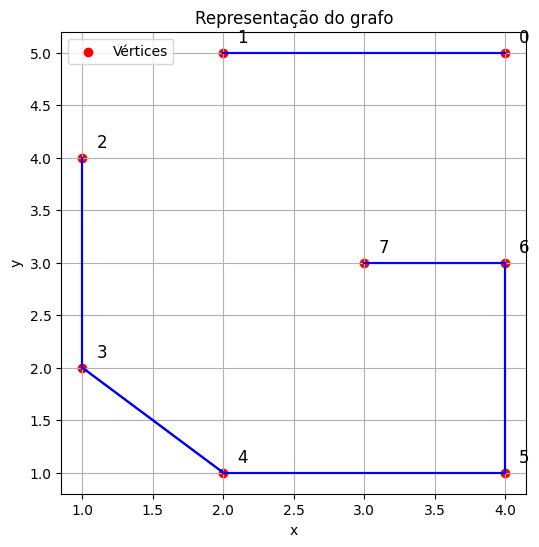

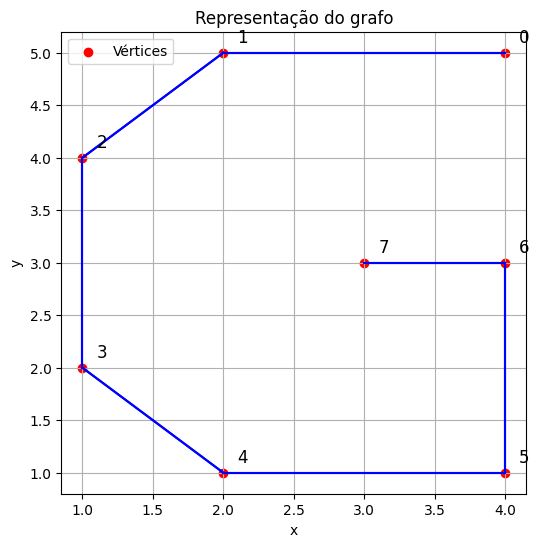

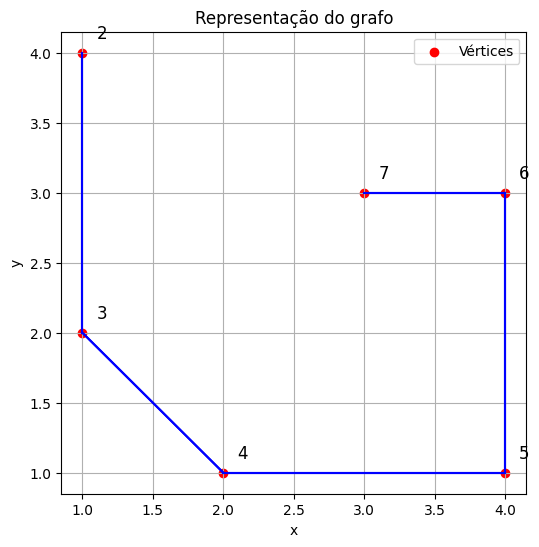

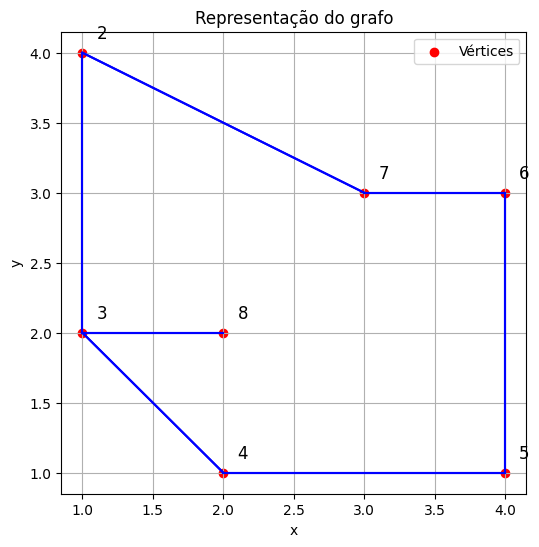

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Inicialiar um dicionário com n elementos, onde esses elementos são tuplas e indicam as coordenas dos vértices desse grafo, o grafo n é identificado pelo seu índice no dicionário

vertices = {
    0: (4, 5),
    1: (2, 5),
    2: (1, 4),
    3: (1, 2),
    4: (2, 1),
    5: (4, 1),
    6: (4, 3),
    7: (3, 3)
}

#Inicializar uma dicionário chamado de conectividade que indica com quem um vértice está ligado, onde o  key value é o vértice e o value é uma conjunto onde os índices dos vértices os quais esse vértice está ligado estão presentes

conectividade = {
    0: {1},
    1: {0,2},
    2: {1,3},
    3: {2,4},
    4: {3,5},
    5: {4,6},
    6: {5,7},
    7: {6}
}


def plotar_grafo(vertices, conectividade):

    # Inicialilzando as listas que terão as coordenas x e y dos vértices

    coord_x = []
    coord_y = []

  # Vericando se o grafo faz sentido]
    lista_remover = []
    for key in vertices.keys():
        if len(conectividade[key]) != 0:
            for elem in conectividade[key]:
                if( not (key  in conectividade[elem])):
                    raise("Esse grafo não está coerente, deve-se checar as conectividades")
        else:
          lista_remover.append(key)

    if len(lista_remover) != 0:
      for elem in lista_remover:
        vertices.pop(elem)

    plt.figure(figsize=(6,6))

    plt.title("Representação do grafo")


    # Plotando os pontos

    for value in vertices.values():
        coord_x.append(value[0])
        coord_y.append(value[1])

    # Plotando os índices no gráfico

    for vertice in vertices.keys():
      plt.text(vertices[vertice][0] + 0.1, vertices[vertice][1] + 0.1, s =  f'{vertice}', fontdict=dict(color='k', size=12))

    plt.scatter(coord_x, coord_y, label="Vértices", color='r')

    # Plotando as arestas
    for key in vertices.keys():
        vertices_alvo = conectividade[key]
        xo = vertices[key][0]
        yo = vertices[key][1]
        if (len(vertices_alvo) != 0):
            for id in vertices_alvo:
                plt.plot([xo, vertices[id][0]], [yo, vertices[id][1]], color = 'b')



    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

def add_aresta(n1, n2):
    # Checa se existe esses dois vértices para que possam ser adicionados

    if(n1 in vertices and n2 in vertices):
        conectividade[n1].add(n2)
        conectividade[n2].add(n1)
    else:
        raise("Erro, ambos os vértices devem exister")

def add_no(x,y):
  chave = len(vertices)
  while(chave in vertices.keys()):
    chave += 1
  vertices[chave] = (x,y)
  conectividade[chave] = set()


def remove_no(n):
  vertices.pop(n)
  for key in conectividade.keys():
    if n in conectividade[key]:
       conectividade[key].discard(n)


def remove_aresta(n1, n2):
    # Checa se realmente eles estão conectados

    if(n1 in conectividade[n2] and n2 in conectividade[n1]):
        conectividade[n1].discard(n2)
        conectividade[n2].discard(n1)
        # Remove os nós que ficaram isolados
        if len(conectividade[n1]) == 0:
          remove_no(n1)
        if len(conectividade[n2]) == 0:
          remove_no(n2)

    else:
        raise("Erro, esses vértices não apresentam arestas os ligando")

# ++++++ Manipulando o grafo +++++++

plotar_grafo(vertices, conectividade)
remove_aresta(1,2)
plotar_grafo(vertices, conectividade)
add_aresta(1,2)
plotar_grafo(vertices, conectividade)
remove_no(1)
plotar_grafo(vertices, conectividade)
add_aresta(2,7)
add_no(2,2)
add_aresta(8,3)
plotar_grafo(vertices, conectividade)




